In [17]:
!wget "http://files.jarviz.live/IV_Semester/Artificial%20Intelligence%20and%20Machine%20learning/Laboratory/Dataset/Social_Network_Ads.csv"

--2023-06-01 02:20:57--  http://files.jarviz.live/IV_Semester/Artificial%20Intelligence%20and%20Machine%20learning/Laboratory/Dataset/Social_Network_Ads.csv
Resolving files.jarviz.live (files.jarviz.live)... 172.67.135.185, 104.21.7.41, 2606:4700:3036::ac43:87b9, ...
Connecting to files.jarviz.live (files.jarviz.live)|172.67.135.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads.     [ <=>                ]   4.40K  --.-KB/s    in 0s      

2023-06-01 02:20:57 (218 MB/s) - ‘Social_Network_Ads.csv’ saved [4503]



In [18]:
!wget "http://files.jarviz.live/IV_Semester/Artificial%20Intelligence%20and%20Machine%20learning/Laboratory/Dataset/Weather.csv"

--2023-06-01 02:21:45--  http://files.jarviz.live/IV_Semester/Artificial%20Intelligence%20and%20Machine%20learning/Laboratory/Dataset/Weather.csv
Resolving files.jarviz.live (files.jarviz.live)... 104.21.7.41, 172.67.135.185, 2606:4700:3036::ac43:87b9, ...
Connecting to files.jarviz.live (files.jarviz.live)|104.21.7.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Weather.csv’

Weather.csv             [ <=>                ]  10.60M  --.-KB/s    in 0.1s    

2023-06-01 02:21:45 (105 MB/s) - ‘Weather.csv’ saved [11118563]



In [19]:
!wget "http://files.jarviz.live/IV_Semester/Artificial%20Intelligence%20and%20Machine%20learning/Laboratory/Dataset/car_evaluation.csv"

--2023-06-01 02:21:45--  http://files.jarviz.live/IV_Semester/Artificial%20Intelligence%20and%20Machine%20learning/Laboratory/Dataset/car_evaluation.csv
Resolving files.jarviz.live (files.jarviz.live)... 104.21.7.41, 172.67.135.185, 2606:4700:3036::ac43:87b9, ...
Connecting to files.jarviz.live (files.jarviz.live)|104.21.7.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘car_evaluation.csv’

car_evaluation.csv      [ <=>                ]  50.65K  --.-KB/s    in 0.01s   

2023-06-01 02:21:45 (4.68 MB/s) - ‘car_evaluation.csv’ saved [51866]



#Write a program to implement Naive Bayes models for the following problem
• Assume we have to find the probability of the randomly picked card to be king given that it is a face card


In [4]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

data = pd.DataFrame({
    'card': ['king', 'queen', 'jack', 'ace', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'face_card': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

face_cards = data['face_card']

feature_extraction = CountVectorizer()
cards = feature_extraction.fit_transform(data['card'])

model = MultinomialNB()
model.fit(cards, face_cards)

card = "king"
input_data = feature_extraction.transform([card])
probability = model.predict_proba(input_data)[:, 1]

print(f"The probability of the card being a king given that it is a face card is: {probability[0]}")


The probability of the card being a king given that it is a face card is: 0.37209302325581395


#Write a program to Implement Bayesian Network that Will model the performance of a student on an exam.

In [14]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00


In [15]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
network = BayesianModel()
difficulty = 'difficulty'
intelligence = 'intelligence'
grade = 'grade'
network.add_node(difficulty)
network.add_node(intelligence)
network.add_node(grade)
network.add_edge(difficulty, grade)
network.add_edge(intelligence, grade)
cpd_difficulty = TabularCPD(variable=difficulty, variable_card=2, values=[[0.6], [0.4]])
cpd_intelligence = TabularCPD(variable=intelligence, variable_card=2, values=[[0.7], [0.3]])
cpd_grade = TabularCPD(variable=grade, variable_card=3,values=[[0.3, 0.05, 0.9, 0.5],[0.4, 0.25, 0.08, 0.3],[0.3, 0.7, 0.02, 0.2]],evidence=[difficulty, intelligence],evidence_card=[2, 2])
network.add_cpds(cpd_difficulty, cpd_intelligence, cpd_grade)
if network.check_model():
 print("The Bayesian network is valid and consistent.")
else:
 print("The Bayesian network is not valid or consistent.")
evidence_data = pd.DataFrame({difficulty: [0], intelligence: [0]})
predicted_values = network.predict(evidence_data)
print("Grade :", predicted_values[grade][0])

/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


The Bayesian network is valid and consistent.


  0%|          | 0/1 [00:00<?, ?it/s]

Grade : 1


#Write a program to plot linear regression for Weather Conditions using the dataset Weather Conditions In World War Two plotting the maximum and minmum temperature.

<ipython-input-20-3e7ce4e9ed25>:9: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Weather.csv')


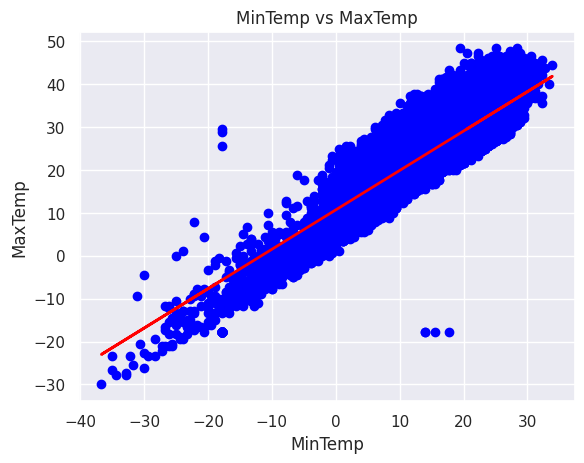

Accuracy: 0.7758664233135365


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

data = pd.read_csv('Weather.csv')

X_train, X_test, y_train, y_test = train_test_split(data['MinTemp'], data['MaxTemp'], test_size=0.2)

model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

y_pred = model.predict(X_test.values.reshape(-1, 1))

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

print(f"Accuracy: {model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")


#Write a program to implement the random forest classifier for the following dataset
https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score

data = pd.read_csv('car_evaluation.csv', header=None)

col_names = ["buying", "maint", "door", "persons", "lug_boot", "safety", "class"]
data.columns = col_names

x = data.drop(["class"], axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2)

encoder = ce.OrdinalEncoder(cols=["buying", "maint", "door", "persons", "lug_boot", "safety"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}")


Accuracy: 96.82080924855492


#Wnte a program to Implement the SVM using the following dataset
https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [ ]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('Social_Network_Ads.csv')

X = data.drop(["Purchased"], axis=1)
y = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}")

#Wnte a program to Implement Averaging method under ensembllng techniques

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()


X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

y_pred = (y_pred1 + y_pred2) / 2

print("Accuracy:", 100-np.mean((y_pred - y_test)**2))



Accuracy: 98.23021269391431


#Wnte a program to build Simple Neural Network models using Pytorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
    random_state = 42)
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).long()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).long()
class NeuralNetwork(nn.Module):
    def __init__(self):
      super(NeuralNetwork, self).__init__()
      self.fc1 = nn.Linear(4, 10)
      self.relu = nn.ReLU()
      self.fc2 = nn.Linear(10, 3)
    def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      return x
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    if (epoch + 1) % 10 == 0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print("Accuracy:", accuracy)

Epoch [10/100], Loss: 0.7692046761512756
Epoch [20/100], Loss: 0.5046119689941406
Epoch [30/100], Loss: 0.4253101944923401
Epoch [40/100], Loss: 0.4949409067630768
Epoch [50/100], Loss: 0.29281800985336304
Epoch [60/100], Loss: 0.4546892046928406
Epoch [70/100], Loss: 0.41693946719169617
Epoch [80/100], Loss: 0.45080697536468506
Epoch [90/100], Loss: 0.1912863552570343
Epoch [100/100], Loss: 0.3223171532154083
Accuracy: 0.9666666666666667
